## Linear Regression & Feature Engineering

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('USA_Housing.csv')
df = data.copy()
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


<div style="font-size:30px;font-weight:bold">

1. Check the data types of columns: 

</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


<div style="font-size:30px;font-weight:bold">

2. Change column names and make them easily readible and writable

</div>

In [32]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [33]:
df.rename(columns = {'Avg. Area Income':'avg_area_income',
                    'Avg. Area House Age':'avg_house_age',
                    'Avg. Area Number of Rooms':'avg_number_of_rooms',
                    'Avg. Area Number of Bedrooms':'avg_number_of_bedrooms',
                    'Area Population': 'population',
                    'Price':'price',
                    'Address':'address'},
         inplace = True)
df.head()

,avg_area_income,avg_house_age,avg_number_of_rooms,avg_number_of_bedrooms,population,price,address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


<div style="font-size:30px;font-weight:bold">

3. Checking duplicate and missing values

</div>

### Checking duplicates

In [4]:
df.duplicated().sum()

np.int64(0)

### Checking missing values

In [5]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
import missingno

<Axes: >

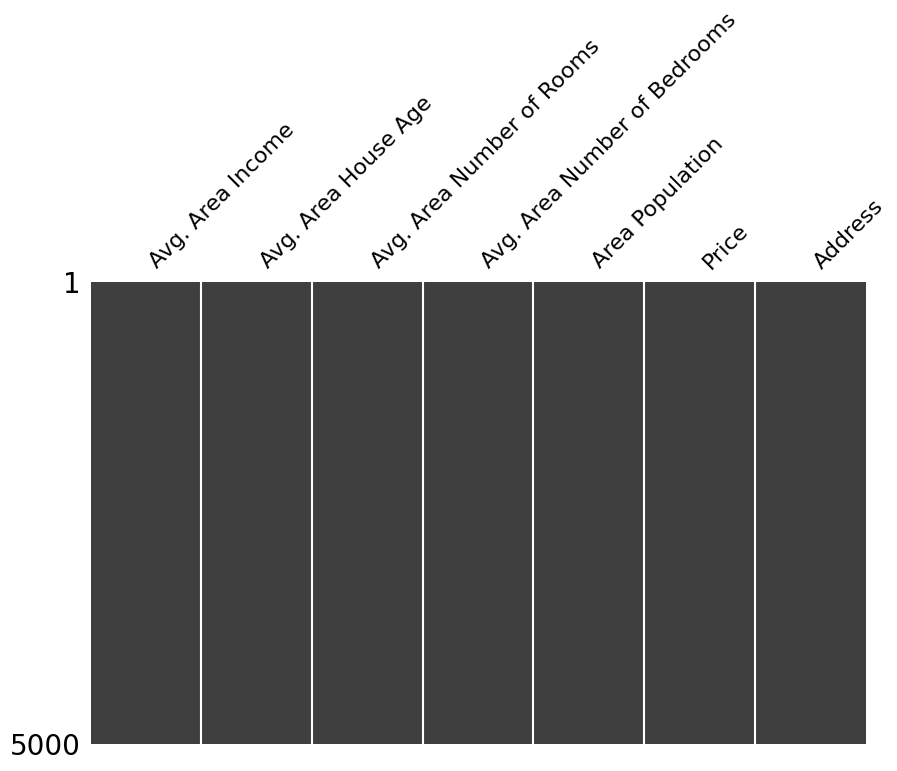

In [7]:
missingno.matrix(df,figsize=(10,6),sparkline=False)

<div style="font-size:20px">

No duplicate or missing values present in the dataset.

</div> 

<div style="font-size:30px;font-weight:bold">

4. Visualize the correlations between variables

</div>

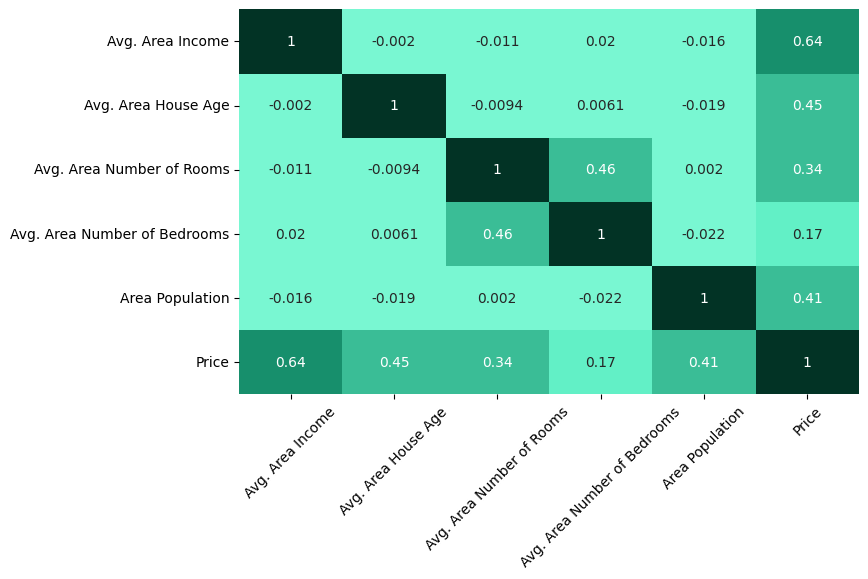

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),cmap=['#79f7d2','#62f0c6','#3abd96','#178f6c','#095c44','#023325'],
           cbar=False, annot=True)
plt.xticks(rotation=45)
plt.show()

<div style= "font-weight:bold"> From the heatmap we can easily tell that there is a strong correlation between these variables:

1. 'Avg Area Income' vs 'Price' (0.64)
2. 'Avg.Area House Age' vs 'Price' (0.45)
3. 'Area Population' vs 'Price' (0.41)
4. 'Avg. Area Number of Rooms' vs 'Price' (0.34)
</div>


<div style="font-size:25px;font-weight:bold">
Only visualize the correlation between target variable ('Price') and remaining variables.

</div>

<Axes: >

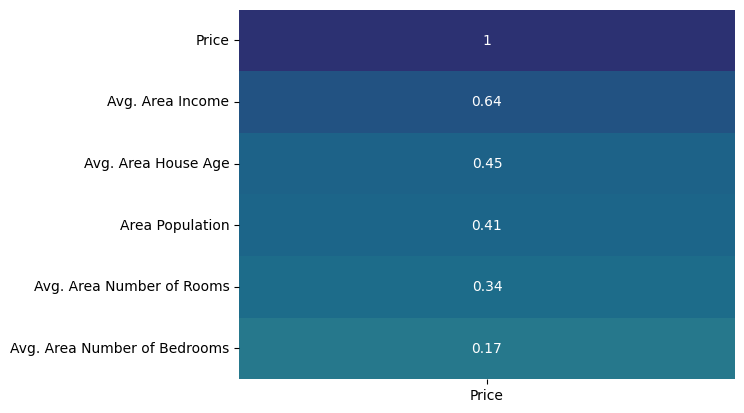

In [23]:
sns.heatmap(df.corr(numeric_only=True)[['Price']].sort_values(by='Price',ascending=False),cbar=False,annot=True,vmin=-1,vmax=1,cmap='crest')

In [65]:
df.columns

Index(['avg_area_income', 'avg_house_age', 'avg_number_of_rooms',
       'avg_number_of_bedrooms', 'population', 'price', 'address'],
      dtype='object')

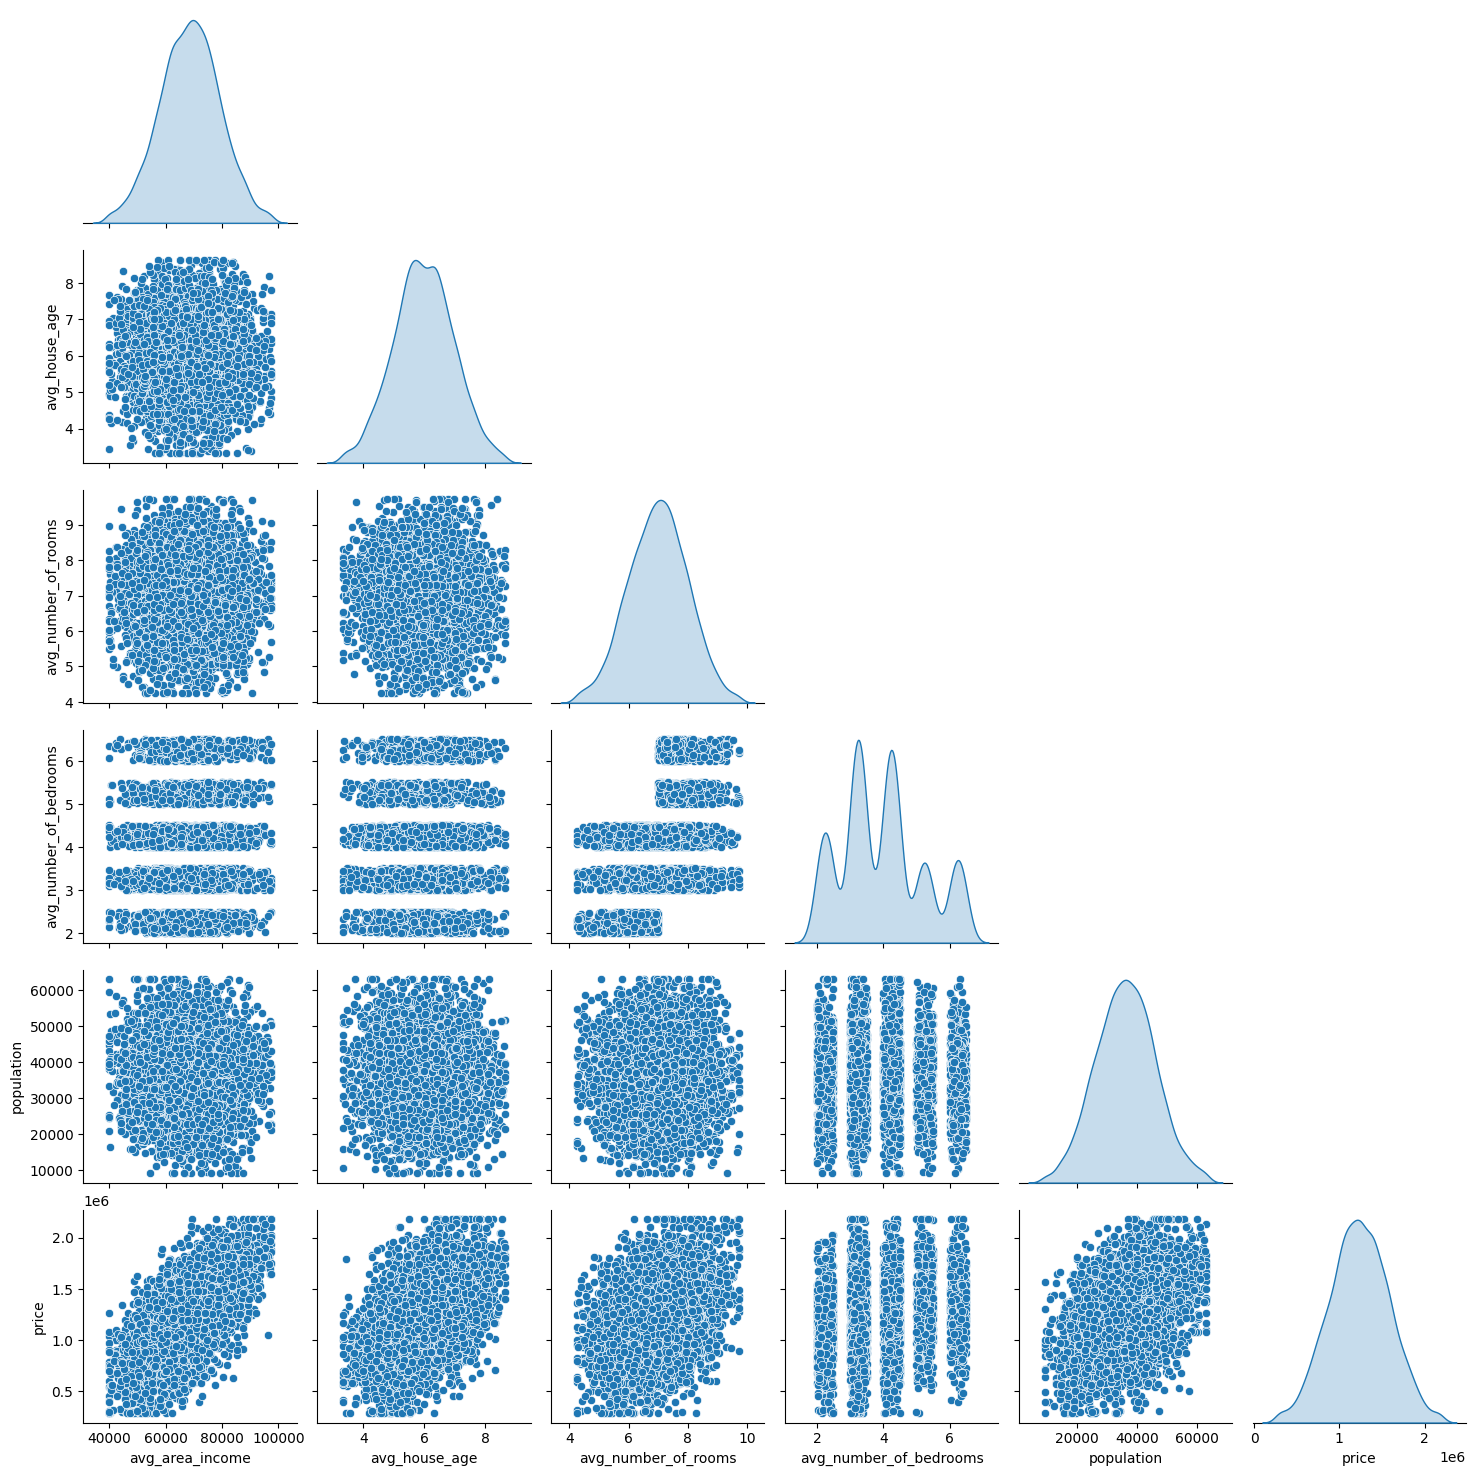

In [113]:
numeric_cols = ['avg_area_income', 'avg_house_age', 'avg_number_of_rooms',
                'avg_number_of_bedrooms', 'population', 'price']

sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
plt.show()

<div style="font-size:30px;font-weight:bold">

5. Detect the outliers

</div>

Text(0.5, 1.0, 'Price')

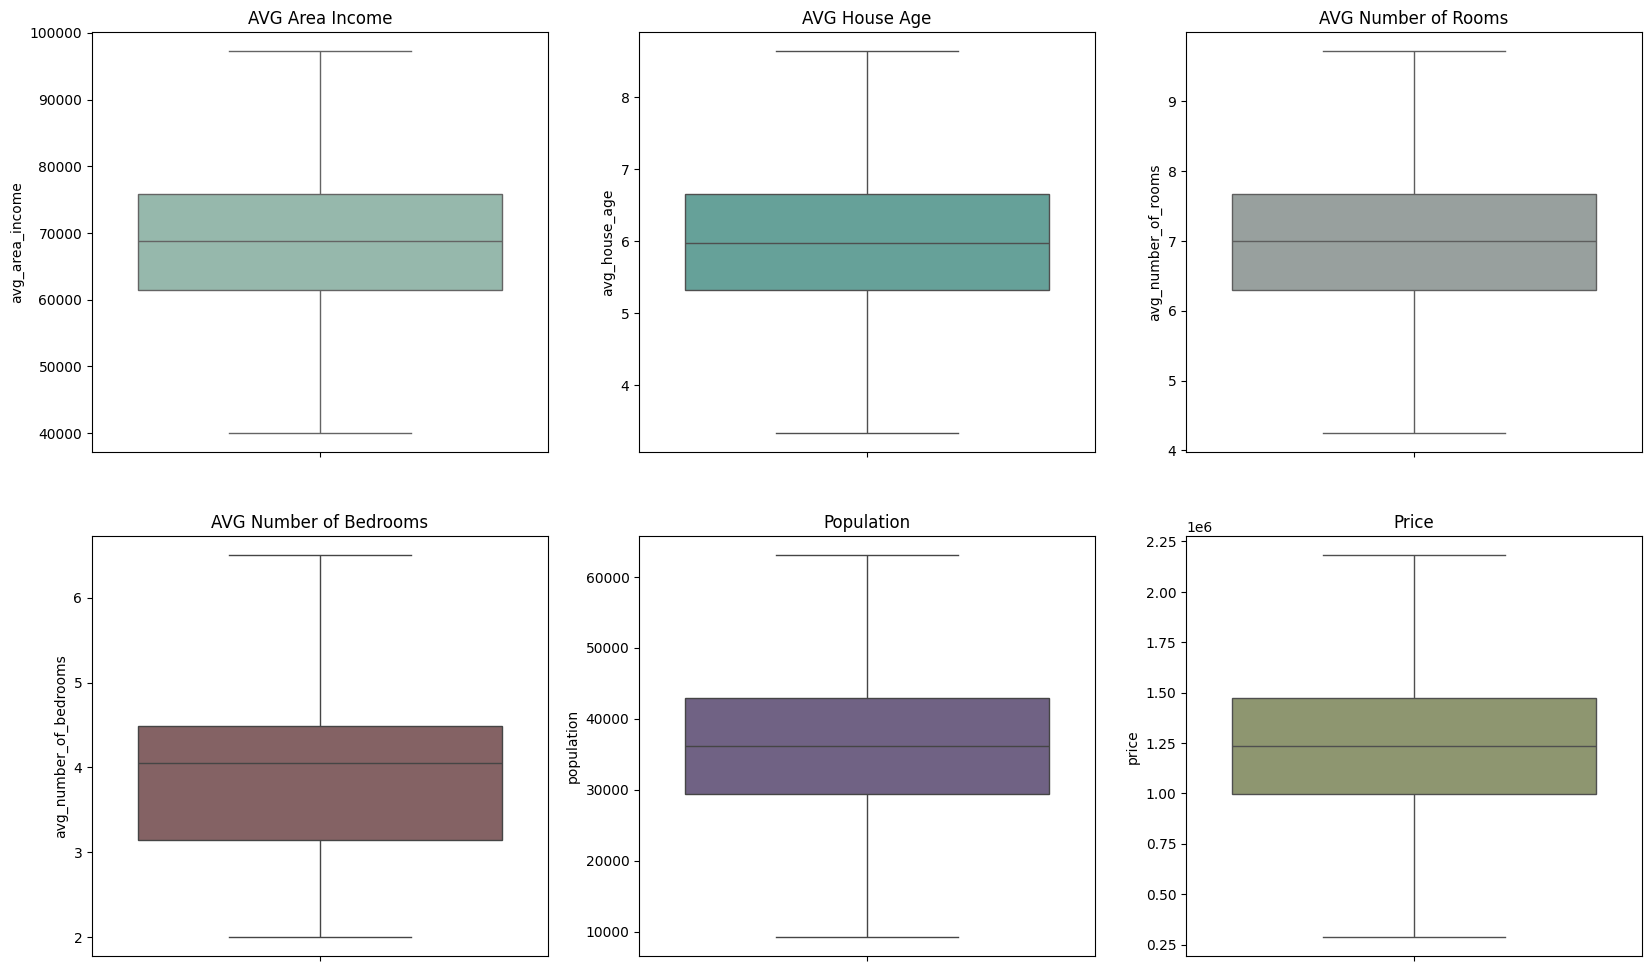

In [112]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(20,12))

columns = ['avg_area_income', 'avg_house_age', 'avg_number_of_rooms',
       'avg_number_of_bedrooms', 'population', 'price']



# plot box-plot for each variable
sns.boxplot(y=df['avg_area_income'], ax = axes[0][0],color='#91bdae')
axes[0][0].set_title('AVG Area Income')


# plot box-plot for each variable
sns.boxplot(y=df['avg_house_age'], ax = axes[0][1], color='#5caba0')
axes[0][1].set_title('AVG House Age')

# plot box-plot for each variable
sns.boxplot(y=df['avg_number_of_rooms'], ax = axes[0][2],color= '#97a19f')
axes[0][2].set_title('AVG Number of Rooms')

# plot box-plot for each variable
sns.boxplot(y=df['avg_number_of_bedrooms'], ax = axes[1][0], color='#8a5c5f')
axes[1][0].set_title('AVG Number of Bedrooms')

# plot box-plot for each variable
sns.boxplot(y=df['population'], ax = axes[1][1], color = '#6f5c8a')
axes[1][1].set_title('Population')


# plot box-plot for each variable
sns.boxplot(y=df['price'], ax = axes[1][2],color = '#919c6a')
axes[1][2].set_title('Price')



### We can see that there are outliers in the columns. Let's remove outliers for each column.

In [100]:
outlier_columns = ['avg_area_income', 'avg_house_age', 'avg_number_of_rooms', 'population', 'price']

for idx, col in enumerate(outlier_columns):
    Q1 = np.percentile(df[col],25)
    Q3 = np.percentile(df[col],75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    df[col] = np.clip(df[col],a_min=lower, a_max = upper)
    

<font size = 5> After removing outliers, re-run the box-plot generation code. Then you will see there is no outlier left.       </font>

<div style="font-size:30px;font-weight:bold">

6. Apply scaling to variables

</div>

In [107]:
# We will scale only features, so split target and features

X = df.drop(['price', 'address'], axis=1)
y = df['price']
X

,avg_area_income,avg_house_age,avg_number_of_rooms,avg_number_of_bedrooms,population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [108]:
from sklearn.preprocessing import StandardScaler

columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [111]:
X = pd.DataFrame(X,columns=columns)
X.head(2)

,avg_area_income,avg_house_age,avg_number_of_rooms,avg_number_of_bedrooms,population
0,1.034822,-0.298541,0.021527,0.088062,-1.325622
1,1.006797,0.025747,-0.256355,-0.722301,0.407049


<div style="font-size:30px;font-weight:bold">

6. Build Linear Regression Model

</div>


<font size = 5> In simple linear regression we are taking only one feature and predicting the target based on that feature. So, we will build 5 models (one model per feature) </font>

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Avg Area Income vs Price

In [125]:
feature1 = X[['avg_area_income']]

# train test split on feature and target
X_train, X_test, y_train, y_test = train_test_split(
    feature1,y, test_size=0.2,random_state=111, shuffle=True 
)

In [126]:
# fit on the training data
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [127]:
# predict on the test data
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

### Visualize the result first, to see how regression line fitted to the data

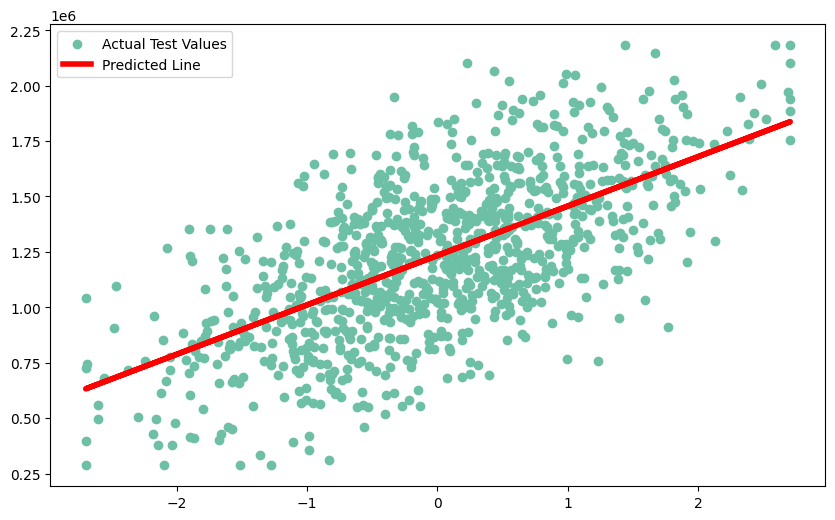

In [137]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='#6dbfa6', label='Actual Test Values')

# Line: predicted values
plt.plot(X_test, y_pred, color='red', label='Predicted Line', linewidth=4)
plt.legend()
plt.show()

<font size=5> <b>From the graph, we can easily see that the line fitted to the test data succesfully. Now, let's evaluate the results mathematically. </font></b>

In [139]:
# mean_absolute_error,r2_score ,mean_absolute_percentage_error,mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error

In [140]:
print("MAE: ", mean_absolute_error(y_test,y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test,y_pred))

MAE:  215857.31351119245
MAPE:  0.21124320883354114
RMSE:  270898.04070804646
R2:  0.4164705243649006


<div style="font-size:25px"> <b> 

1. MAE is 215857, so there is a mean error of approximately 216000 dollars.
2. Mean Absolute Percentage Error is 0.211, it means on average predicted values are 21% far from actual values .
3. RMSE shows 270898 (almost 271000) error
4. R2 is 0.41 (41%), it means the avg_area_income variable explains 41% variability in the data.

Interpretation: Our model shows reasonable performance but there is a lot to do to improve the accuracy of the model.

### Avg House Age vs Price 

In [144]:
feature2 = X[['avg_house_age']]


# Train test split
X_test, X_train, y_test, y_train = train_test_split(
    feature2, y, test_size=0.2,random_state=111, shuffle=True
)

In [145]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [146]:
y_pred = model.predict(X_test)

#### Visual results

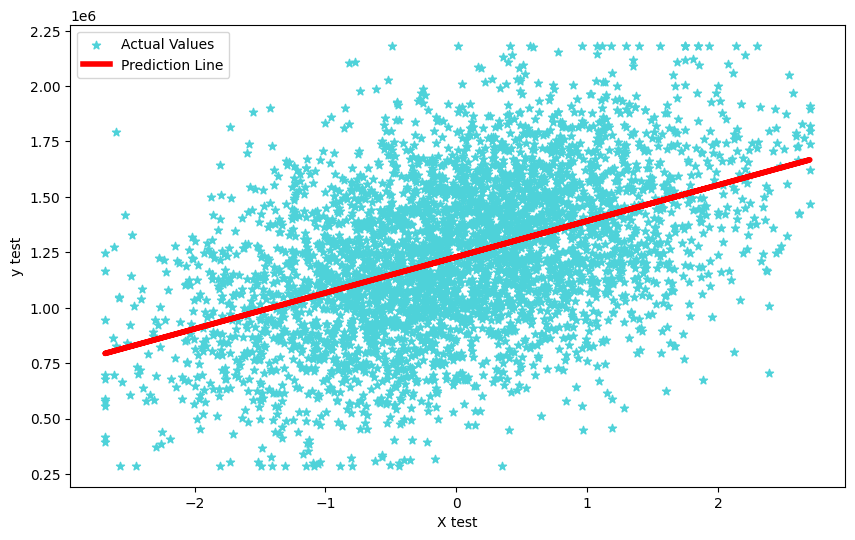

In [153]:
plt.figure(figsize = (10,6))
plt.scatter(X_test, y_test, c = '#4ed2d9', label = 'Actual Values', marker = '*')
plt.plot(X_test, y_pred, c = 'red', linewidth = 4, label = 'Prediction Line')
plt.legend()
plt.xlabel('X test')
plt.ylabel('y test')
plt.show()

#### Analytical results

In [154]:
print("MAE: ", mean_absolute_error(y_test,y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test,y_pred))

MAE:  250777.4547410882
MAPE:  0.2454908719889848
RMSE:  313077.53273619513
R2:  0.20141465448129325


<div style="font-size:25px"> <b> 

1. MAE is 250777, so there is a mean error of approximately 250777 dollars.
2. Mean Absolute Percentage Error is 0.245, it means on average predicted values are 25% far from actual values .
3. RMSE shows 313077 (almost 313000) error
4. R2 is 0.20 (20%), it means the avg_area_income variable explains 20% variability in the data.

Interpretation: Our model shows poor performance, even worse than the 'Avg Area Income' feature. This result was predictable, because in the correlation heatmap the 'Avg Area Income' feature has more correlation with 'Price' rather than 'Avg House Age'

### avg_number_of_rooms vs price

In [158]:
feature3 = X[['avg_number_of_rooms']]

X_test, X_train, y_test, y_train = train_test_split(
    feature3, y, random_state = 111, shuffle=True 
)

In [159]:
model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [160]:
y_pred = model.predict(X_test)

### Visual Results

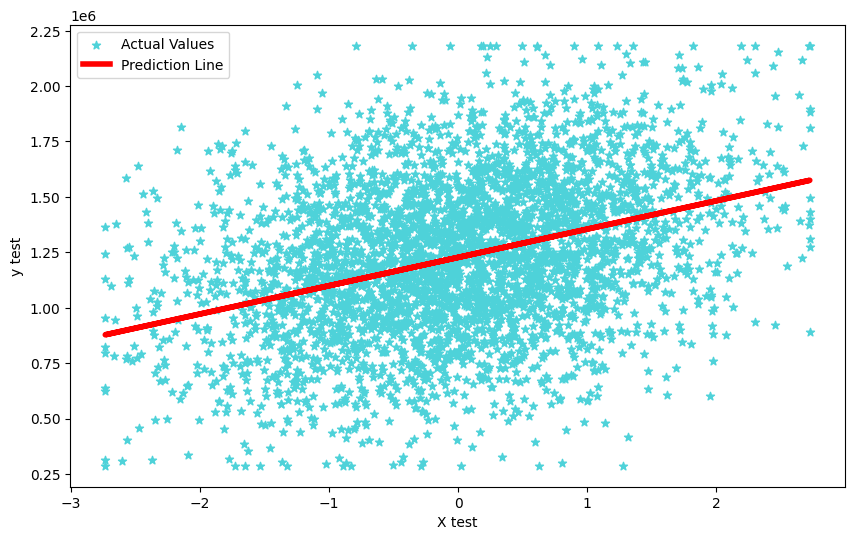

In [161]:
plt.figure(figsize = (10,6))
plt.scatter(X_test, y_test, c = '#4ed2d9', label = 'Actual Values', marker = '*')
plt.plot(X_test, y_pred, c = 'red', linewidth = 4, label = 'Prediction Line')
plt.legend()
plt.xlabel('X test')
plt.ylabel('y test')
plt.show()

### Analytical Results

In [162]:
print("MAE: ", mean_absolute_error(y_test,y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test,y_pred))

MAE:  267005.82287551963
MAPE:  0.2631782301344287
RMSE:  332428.0538928259
R2:  0.10597700543041366


### avg_number_of_bedrooms vs price

In [165]:
feature4 = X[['avg_number_of_bedrooms']]

X_test, X_train, y_test, y_train = train_test_split(
    feature4, y,test random_state = 111, shuffle=True 
)

In [166]:
model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [167]:
y_pred = model.predict(X_test)

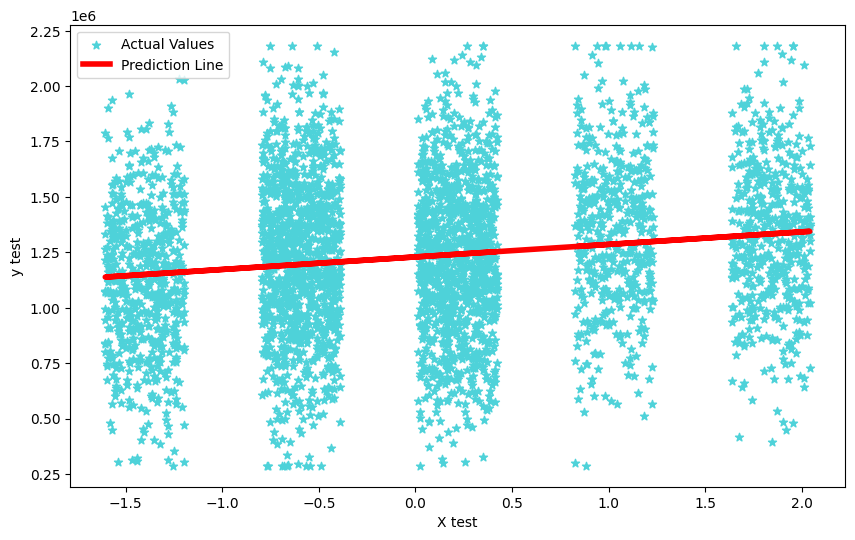

In [168]:
plt.figure(figsize = (10,6))
plt.scatter(X_test, y_test, c = '#4ed2d9', label = 'Actual Values', marker = '*')
plt.plot(X_test, y_pred, c = 'red', linewidth = 4, label = 'Prediction Line')
plt.legend()
plt.xlabel('X test')
plt.ylabel('y test')
plt.show()

In [169]:
print("MAE: ", mean_absolute_error(y_test,y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test,y_pred))

MAE:  278147.46213496744
MAPE:  0.27760752782391246
RMSE:  346203.8046793502
R2:  0.03034547715933522


### population vs price


In [173]:
feature5 = X[['population']]
X_test, X_train, y_test, y_train = train_test_split(
    feature5, y, random_state = 111, shuffle=True 
)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

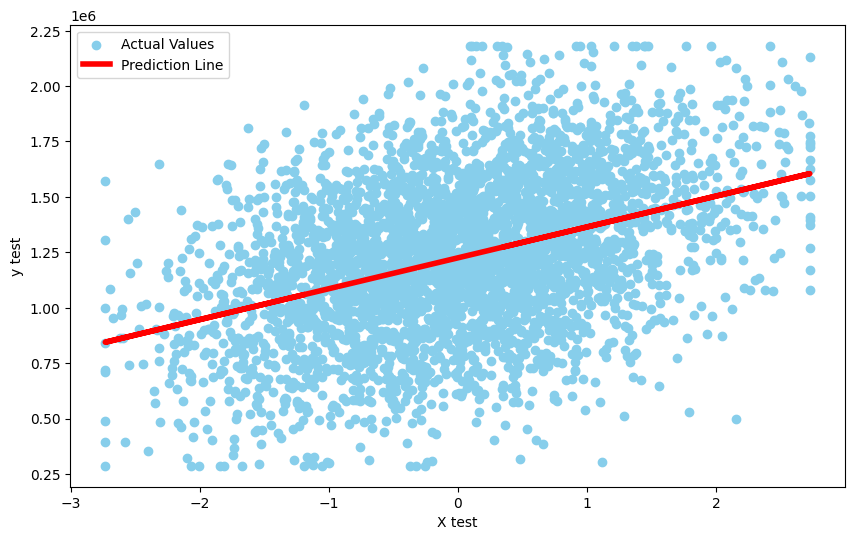

In [177]:
plt.figure(figsize = (10,6))
plt.scatter(X_test, y_test, c = 'skyblue', label = 'Actual Values')
plt.plot(X_test, y_pred, c = 'red', linewidth = 4, label = 'Prediction Line')
plt.legend()
plt.xlabel('X test')
plt.ylabel('y test')
plt.show()

In [175]:
print("MAE: ", mean_absolute_error(y_test,y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test,y_pred))

MAE:  255611.45032040108
MAPE:  0.25100970219089885
RMSE:  320174.0773080874
R2:  0.17067322271591445


<font size = 5> The most accurate model is the regression model between Avg Area Income and Price </font>

<div style="font-size:30px;font-weight:bold">

7. Multiple Linear Regression

</div>

In [181]:
X = df.drop(['price','address'],axis=1)
y = df['price']

In [182]:
X_test, X_train, y_test, y_train = train_test_split(
    X,y,random_state=111,test_size=0.2,shuffle=True 
)

In [185]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [191]:
results = pd.DataFrame(data={'Actual': y_test, 'Predicted':y_pred})
results

,Actual,Predicted
1024,9.748060e+05,7.665810e+05
1670,1.222690e+06,1.328048e+06
1092,7.061351e+05,5.401117e+05
1155,1.248131e+06,1.138177e+06
606,1.450625e+06,1.345377e+06
...,...,...
681,1.290325e+06,1.384760e+06
4182,3.955232e+05,4.027693e+05
4820,6.441425e+05,6.347367e+05
2004,9.765401e+05,1.047502e+06


In [197]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

print("MSE: ", np.round(mean_squared_error(y_test,y_pred),2))
print("MAPE: ", np.round(mean_absolute_percentage_error(y_test,y_pred),2))
print("R2: ", np.round(r2_score(y_test,y_pred),2))

MSE:  10279634465.54
MAPE:  0.07
R2:  0.92


## Summary of the homework

<div style="font-size:25px; font-weight:bold">

When we apply simple linear regression on each feature, we see that the performance metrics is less than 50% even for the most correlated variable (AVG Area Income). However, when **Multiple Linear Regression**  is applied, the mean absolute percentage error is 7%, and r2 score is more than 90%. So, the error became very small and the model explains 92% of the variance of the target value.

In [199]:
X_test.iloc[2,:]

avg_area_income           53927.412808
avg_house_age                 4.528066
avg_number_of_rooms           5.675535
avg_number_of_bedrooms        3.350000
population                37875.550125
Name: 1092, dtype: float64

In [204]:
x = np.array([53927, 4.5, 5.6, 3.3, 37875])

In [207]:
model.predict(x.reshape(1,-1))

C:\Users\asado\anaconda3\envs\mycode\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([526220.43491584])

In [209]:
y_test.iloc[2]

np.float64(706135.1446389129)